In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("E:/Users/Saqif Tahmid/Desktop/CNN/clean_weather.csv", index_col=0)
data = data.ffill()
data.head()


,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


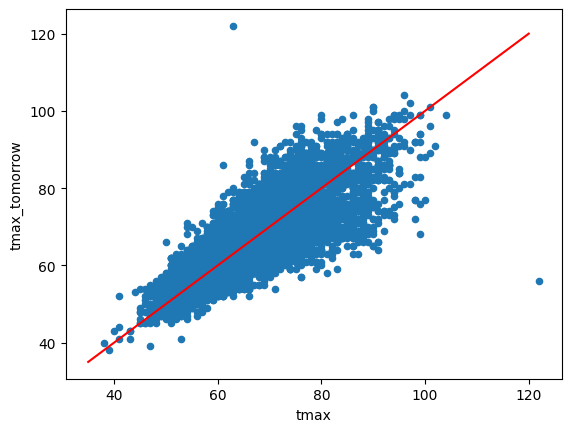

In [3]:
data.plot.scatter("tmax", "tmax_tomorrow")
plt.plot([35,120], [35,120], 'red')

In [4]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(data[["tmax"]], data["tmax_tomorrow"])

LinearRegression()

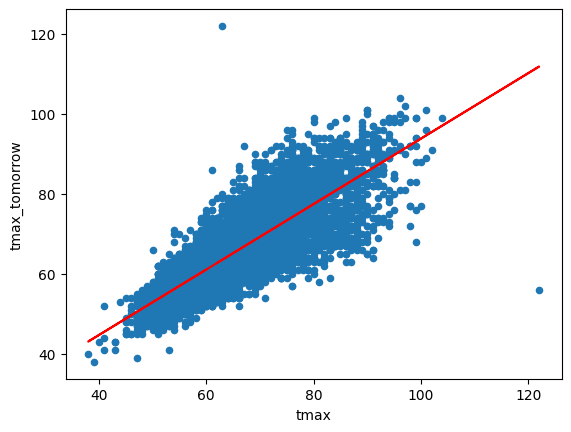

In [5]:
data.plot.scatter("tmax", "tmax_tomorrow")
plt.plot(data["tmax"], lr.predict(data[["tmax"]]), "red")

In [6]:
print(f"WEIGHT:{lr.coef_[0]:.2f}")
print(f"BIAS:{lr.intercept_:.2f}")

WEIGHT:0.82
BIAS:11.99


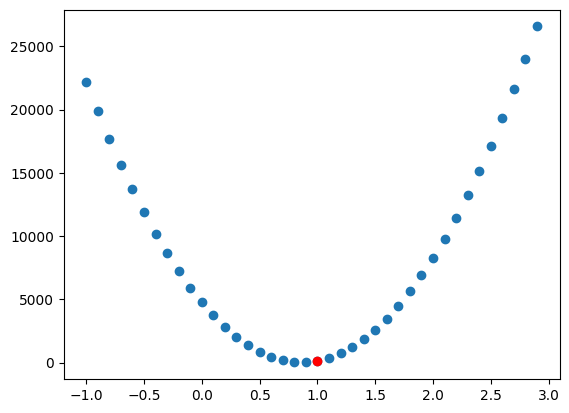

In [7]:
# This is the meansquared value which is the square of the difference between the predicted value
# for tmax_tomorrow and the acutal value where w is the weight of precicted tmax_tomorrow 
# against tmax today
# b is the intercept of the graph of predicted_tmax_tomorrow against tmax today. 

loss = lambda w ,y:((w*80 + 11.99)- y)**2
y = 81

ws = np.arange(-1, 3, 0.1)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(1, loss(1, y), "ro")

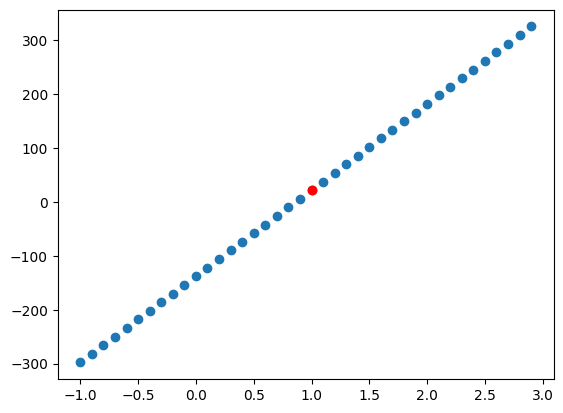

In [8]:
# This is the gradient of the curve of meanquared loss against the weight
gradient = lambda w, y: ((w*80 + 11.99) - y) * 2
gradients= gradient(ws, y)
plt.scatter(ws, gradients)
plt.plot(1, gradient(1, y), 'ro')

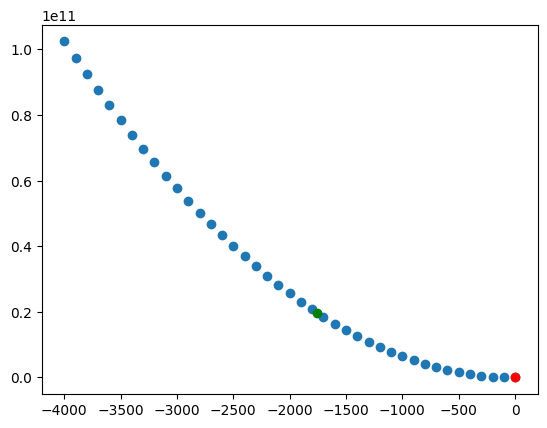

In [9]:
ws = np.arange(-4000,100,100)
losses = loss(ws, y)

# Plot the weight and losses
plt.scatter(ws, losses)

# Original weight
plt.plot(1, loss(1, y), 'ro')
# New weight
# Our parital derivative of rate of change of loss with respect to w is the rate of change of loss multiplied by our x
# as partial derivate of 
new_weight = 1-gradient(1,y) * 80
plt.plot(new_weight, loss(new_weight, y), 'go')

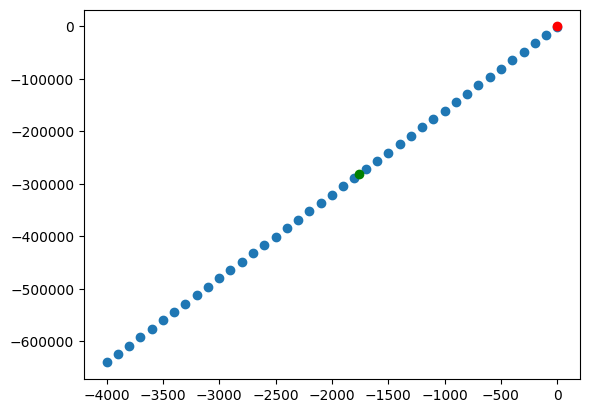

In [10]:
import numpy as np
# Calculate gradient values for several weights
gradients = gradient(ws, y)

# Plot the weight and gradients
plt.scatter(ws, gradients)
plt.plot(1, gradient(1, y), 'ro')
# New weight
plt.plot(new_weight, gradient(new_weight, y), 'go')

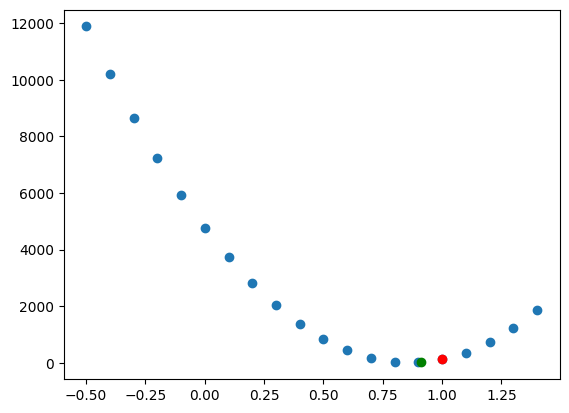

In [11]:
ws = np.arange(-.5,1.5,.1)
losses = loss(ws, y)

# Plot the weight and losses
plt.scatter(ws, losses)

# Original weight
plt.plot(1, loss(1, y), 'ro')
# New weight with learning rate
lr = 5e-5
new_weight = 1 - lr * gradient(1,y) * 80
plt.plot(new_weight, loss(new_weight, y), 'go')

In [12]:
import numpy as np 
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Ensure we get the same split every time
np.random.seed(0)

split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(),
                                                            d[[TARGET]].to_numpy()]
                                                            for d in split_data]

            tmax  tmin  rain  tmax_tomorrow
1970-01-01  60.0  35.0  0.00           52.0
1970-01-02  52.0  39.0  0.00           52.0
1970-01-03  52.0  35.0  0.00           53.0
1970-01-04  53.0  36.0  0.00           52.0
1970-01-05  52.0  35.0  0.00           50.0
...          ...   ...   ...            ...
2011-10-17  84.0  59.0  0.00           70.0
2011-10-18  70.0  57.0  0.01           70.0
2011-10-19  70.0  62.0  0.00           68.0
2011-10-20  68.0  59.0  0.00           77.0
2011-10-21  77.0  59.0  0.00           84.0

[9456 rows x 4 columns]
            tmax  tmin  rain  tmax_tomorrow
2011-10-22  84.0  50.0   0.0           85.0
2011-10-23  85.0  54.0   0.0           72.0
2011-10-24  72.0  60.0   0.0           70.0
2011-10-25  70.0  53.0   0.0           74.0
2011-10-26  74.0  44.0   0.0           76.0
...          ...   ...   ...            ...
2017-05-05  69.0  54.0   0.0           66.0
2017-05-06  66.0  52.0   0.0           73.0
2017-05-07  73.0  54.0   0.0           73.0
2017-05

c:\Users\saqif\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
import math

def init_params(predictors):
    # Initialize model parameters
    # k is a scaling factor that we use to reduce the weights and biases initially
    k = math.sqrt(1 / predictors)
    # We set a random seed so if we re-run this code, we get the same results
    np.random.seed(0)
    weights = np.random.rand(predictors, 1) * 2 * k - k
    biases = np.ones((1, 1)) * 2 * k - k
    return  [weights, biases]

# In summary, this function is designed to provide initial values for the parameters 
# (weights and biases) of a linear regression model. The use of a scaling factor and 
# setting a random seed ensures a controlled and reproducible initialization process.
# The generated values are within a specified range, which can be beneficial for the 
# stability of the learning algorithm.

In [14]:
def forward(params, x):
    weights, biases = params
    # Multiply x values by w values with matrix multiplication, then add b
    prediction = x @ weights + biases
    return prediction

In [15]:
def mse(actual, predicted):
    # Calculate mean squared error
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    # The derivative of mean squared error
    return predicted - actual 

In [16]:
def backward(params, x, lr, grad):
    # Multiply the gradient by the x values
    # Divide x by the number of rows in x to avoid updates that are too large
    w_grad = (x.T / x.shape[0]) @ grad
    b_grad = np.mean(grad, axis=0)

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr

    return params

In [17]:
lr = 1e-4
epochs = 50000
params = init_params(train_x.shape[1])

# Store weights and gradients so we can visualize
# Not necessary for algorithm
sample_rate = 100
samples = int(epochs / sample_rate)
historical_ws = np.zeros((samples, train_x.shape[1]))
historical_gradient = np.zeros((samples,))

for i in range(epochs):
    predictions = forward(params, train_x)
    grad = mse_grad(train_y, predictions)

    params = backward(params, train_x, lr, grad)

    # Store historical weights for visualization
    if i % sample_rate == 0:
        index = int(i / sample_rate)
        historical_gradient[index] = np.mean(grad)
        historical_ws[index,:] = params[0][:,0]

    # Display validation loss
    if i % 10000 == 0:
        predictions = forward(params, valid_x)
        valid_loss = mse(valid_y, predictions)

        print(f"Epoch {i} validation loss: {valid_loss}")

Epoch 0 validation loss: 297.27540770706094
Epoch 10000 validation loss: 22.647249675483113
Epoch 20000 validation loss: 22.613777406314746
Epoch 30000 validation loss: 22.581085439005864
Epoch 40000 validation loss: 22.5491541585802


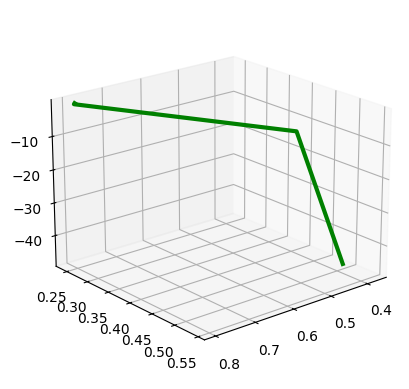

In [18]:
import matplotlib.pyplot as plt

# Create a figure and a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20,50)

# Plot the path of the optimization algorithm
ax.plot3D(historical_ws[:,0], historical_ws[:,1], historical_gradient, 'green', linewidth=3, zorder=10)

# Show the plot
plt.show()